# Training of TensorFlow Neural Network

This network takes in x input values from the sensors and outputs a singular float value which is estimated to be the windspeed

## Data Extraction

In [1]:
%pip install numpy matplotlib


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Read the CSV File
Load them into one dimensional np arrays for plotting. For training - use all columns expect for the time. Also ensure that the ground truth is synced with the data readings from our sensor

In [3]:
filename = 'data/123.csv'

arr = np.loadtxt(filename, delimiter=',', skiprows=1) # skiprows=1 if there is a header
time = arr[:, 0]
v_est = arr[:, 1]
# cup = arr[:, 2]
# v_est = arr[:, 3]

display(v_est)

array([0.1133, 0.2184, 0.3224, ..., 4.1216, 4.1165, 4.1143], shape=(2236,))

### Plotting

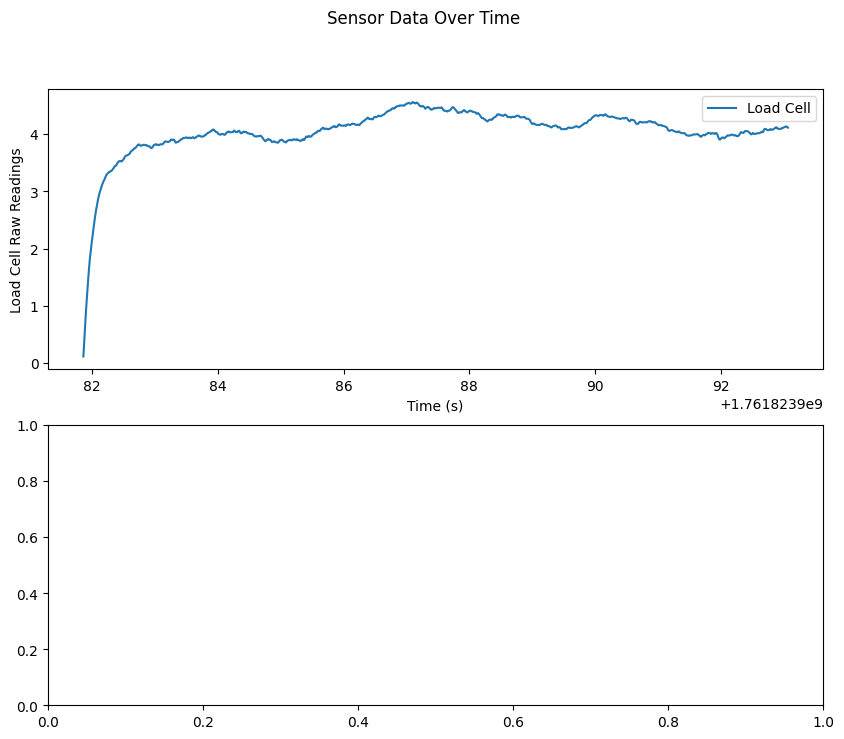

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Sensor Data Over Time')

axs[0].plot(time, v_est, label='Load Cell')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Load Cell Raw Readings')
axs[0].legend()

# axs[1].plot(time, cup_ticks, label='Cup Ticks')
# axs[1].set_xlabel('Time (s)')
# axs[1].set_ylabel('Cup Ticks')
# axs[1].legend()

# axs[2].plot(time, cup_delta, label='Delta Ticks')
# axs[2].set_xlabel('Time (s)')
# axs[2].set_ylabel('Delta Ticks')
# axs[2].legend()
plt.show()

Timing Errors

In [5]:
mean_time_diff = np.mean(np.diff(time))
print(f"Mean time difference between readings: {mean_time_diff:.4f} seconds")

Mean time difference between readings: 0.0050 seconds


In [6]:
max_time_diff = np.max(np.diff(time))
print(f"Max time difference between readings: {max_time_diff:.4f} seconds")

Max time difference between readings: 0.0116 seconds


Plot the time differences:

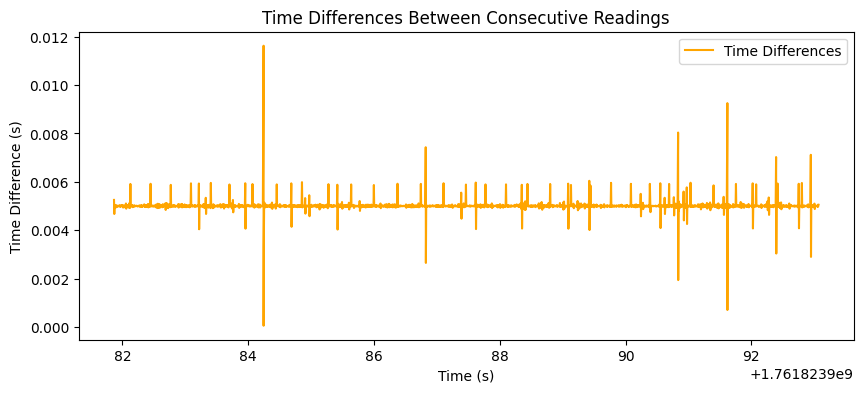

In [7]:
time_diff_arr = np.diff(time)
plt.figure(figsize=(10, 4))
plt.plot(time[1:], time_diff_arr, label='Time Differences', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Time Difference (s)')
plt.title('Time Differences Between Consecutive Readings')
plt.legend()
plt.show()

## SCALE CALIBRATION

Basically lay the load cell flat on the table, tare it and read the raw counts over a 30 second window with 3 different weights
Plot those values on a graph and use a best fit line to get the scale factor in (rawCounts/N)

In [4]:
file_weight1 = 'data/scale_calibration/scale_test_50g.csv'
file_weight2 = 'data/scale_calibration/scale_test_200g.csv'

g = 9.80665 # ms^-2

# known masses of the calibration weights [kg]
mass1 = 0.050
mass2 = 0.200
# mass3 = 1.000

# convert masses to forces
force1 = mass1 * g
force2 = mass2 * g
# force3 = mass3 * g

arr_scale1 = np.loadtxt(file_weight1, delimiter=',', skiprows=1) # skiprows=1 if there is a header
arr_scale2 = np.loadtxt(file_weight2, delimiter=',', skiprows=1) # skiprows=1 if there is a header
# arr_scale3 = np.loadtxt(file_weight2, delimiter=',', skiprows=1) # skiprows=1 if there is a header

# isolate the values we care about (i.e. raw counts)
load_cell_scale1 = arr_scale1[:, 1]
load_cell_scale2 = arr_scale2[:, 1]
# load_cell_scale3 = arr_scale3[:, 1]

load_cell_scale1.shape

(1200,)

Combine into 2D arrays with columns for known force and raw count readings
- ultimately stack them into one array

In [5]:
# Generate fixed arrays for the none forces

# Scale 1
fixed_column1 = np.full(load_cell_scale1.shape, force1)

# Scale 2
fixed_column2 = np.full(load_cell_scale2.shape, force2)

# Scale 2
# fixed_column3 = np.full(load_cell_scale3.shape, force1)

print(fixed_column2)

[1.96133 1.96133 1.96133 ... 1.96133 1.96133 1.96133]


In [ ]:
# extract x and y for polyfit
forces = np.hstack((fixed_column1, fixed_column2))
raw_readings = np.hstack((load_cell_scale1, load_cell_scale2)) 

# fit linearly 
a, b = np.polyfit(raw_readings, forces, deg=1)

print(f"Scale factor a = {a:.8e} N/count")
print(f"Offset b = {b:.8e} N")

Scale factor a = 8.76884498e-06 N/count
Offset b = 3.92787482e+00 N


### Understand variance